<a href="https://colab.research.google.com/github/jessica-guan/TRAIN-Notebooks/blob/main/Copy_of_TRAIN_YLC_Week_11_Lab_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 11: Semester Review [OPTIONAL]**
---

### **Description**
This optional part of the notebook will provide additional practice with data exploration and visualization, as well as linear regression and KNN modeling with sklearn.

<br>

### **Structure**
**Part 1**: [Exploratory Data Analysis](#p1)

**Part 2**: [Data Visualizations](#p2)

>  **Part 2.1**: [Scatter Plots](#p2.1)
>
>  **Part 2.2**: [Line Plots](#p2.2)
>
>  **Part 2.3**: [Bar Plots](#p2.3)

**Part 3**: [Linear Regression](#p3)

**Part 4**: [KNN](#p4)

**Part 5**: [K-Folds Cross Validation](#p5)

<br>


### **Resources**
* [Python Basics Cheat Sheet](https://docs.google.com/document/d/1bMqW8SKR6xC0-d1f0hb-DnYPJ0CyszjiwPCovAl9TLc/edit?usp=drive_link)

* [EDA with pandas Cheat Sheet](https://docs.google.com/document/d/1xnKJsii1AsRH2t22XtrAh7FzSFGqAR0hAmW4oLYM4MI/edit?usp=drive_link)

* [Data Visualization with matplotlib Cheat Sheet](https://docs.google.com/document/d/1_3hzeIBPvcT6VC-eK-DDGVsKUvdVSvylNepoSLn2-T4/edit?usp=drive_link)

* [Linear Regression with sklearn Updated Cheat Sheet](https://docs.google.com/document/d/1DPUqouqGKeAYBfNBoHNsKRoQGXfD7mjUAvjjK0VsLbc/edit?usp=drive_link)

* [K-Nearest Neighbors with sklearn Cheat Sheet](https://docs.google.com/document/d/1QltUCIlM0FOkalov1aPXOkOVQme3Ot1AUThiSUbh-kI/edit?usp=drive_link)

* [Feature Scaling and K-Folds Cross Validation with sklearn Cheat Sheet](https://docs.google.com/document/d/1XCYdpH4jtrbKtCQvNRQPKI5H_UWFg4LiPdZ4qabHmfo/edit?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import datasets
from sklearn.metrics import *

<a name="p1"></a>

---
## **Part 1: Exploratory Data Analysis**
---

#### **Problem #1.1**
This dataset contains historical statistics for NBA (National Basketball Association) players, sourced from Basketball-Reference.com. The data includes a wide range of metrics from basic statistics like games played and minutes played to more advanced statistics like player efficiency ratings. While the dataset is rich and detailed, we are only focusing on a subset of the available columns to introduce you to the basics of data exploration and manipulation.

<br>

**Even if you're not familiar with basketball, understanding the data columns should still be relatively straightforward. Here's what each column we're using means:**

- `player_id`: A unique ID assigned by Basketball-Reference.com to each player.

- `name_common`: The name of the basketball player.

- `year_id`: This refers to the NBA season year. For example, the 2019-2020 NBA season would be represented as "2000".

- `age`: The age of the player as of February 1 of that season.

- `team_id`: The abbreviation for the team that the player played for during that season. Each NBA team has a unique abbreviation, like 'LAL' for the Los Angeles Lakers.

- `G`: Games Played - The number of games the player participated in during that season.

- `Min`: Minutes Played - The total number of minutes the player was on the court during the season.

- `MPG`: Minutes Per Game - This is the average number of minutes the player was on the court per game during the season. It's calculated as Min divided by G.

- `FT%`: Free Throw Percentage - This is the percentage of free throws the player made successfully. A free throw is an opportunity given to a player to score one point, unopposed, from a position 15 feet from the basket. It's calculated as Free Throws Made divided by Free Throws Attempted.

<br>

**Run the code cell below to load the data.**

In [ ]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/nba-player-advanced-metrics/master/nba-data-historical.csv'
nba_df = pd.read_csv(url)
nba_df = nba_df[['player_id', 'name_common', 'year_id', 'age', 'team_id', 'G', 'Min', 'MPG', 'FT%']]
nba_df = nba_df.dropna()
nba_df

,player_id,name_common,year_id,age,team_id,G,Min,MPG,FT%
808,youngtr01,Trae Young,2019,20,ATL,81,2503,30.9,82.9
809,huertke01,Kevin Huerter,2019,20,ATL,75,2048,27.3,73.2
810,bembrde01,DeAndre' Bembry,2019,24,ATL,82,1931,23.5,64.0
811,collijo01,John Collins,2019,21,ATL,61,1829,30.0,76.3
812,bazemke01,Kent Bazemore,2019,29,ATL,67,1643,24.5,72.6
...,...,...,...,...,...,...,...,...,...
28163,weissbo01,Bob Weiss,1977,34,WSB,62,768,12.4,78.4
28164,riordmi01,Mike Riordan,1977,31,WSB,49,289,5.9,73.3
28165,weathni01,Nick Weatherspoon,1977,26,WSB,11,152,13.8,62.5
28166,pacejo01,Joe Pace,1977,23,WSB,30,119,4.0,55.2


#### **Problem #1.2**

How many players are included in this dataset?

In [ ]:
len(nba_df)

19489

#### **Problem #1.3**

How many columns are in this DataFrame?

In [ ]:
len(nba_df.columns)

9

#### **Problem #1.4**
How many columns contain numerical data?

In [ ]:
len(nba_df.select_dtypes(include=[np.number]).columns)

6

#### **Problem #1.5**

How many different NBA teams (`team_id`) are included in the dataset?

In [ ]:
nba_df['team_id'].nunique()

42

#### **Problem #1.6**

What is the most common `age` among all players in the dataset?

In [ ]:
nba_df['age'].value_counts().idxmax()

23


#### **Problem #1.7**

Complete the code below to output players above the age of 35.

In [ ]:
older_players = nba_df[nba_df['age'] > 35]

older_players['player_id']

816      cartevi01
902      parketo01
950      korveky01
970      nowitdi01
1022     caldejo01
           ...    
25091    hayesel01
25580    hayesel01
26757    silaspa01
27284    havlijo01
27735    havlijo01
Name: player_id, Length: 502, dtype: object


#### **Problem #1.8**

Extract the following columns: `player_id`, `age`, `FT%`

In [ ]:
nba_df[['player_id', 'age', 'FT%']]

,player_id,age,FT%
808,youngtr01,20,82.9
809,huertke01,20,73.2
810,bembrde01,24,64.0
811,collijo01,21,76.3
812,bazemke01,29,72.6
...,...,...,...
28163,weissbo01,34,78.4
28164,riordmi01,31,73.3
28165,weathni01,26,62.5
28166,pacejo01,23,55.2


####**Problem #1.9**
Identify players with a Free-Throw Percentage (`FT%`) greater than 90%.

In [ ]:
high_ft_players = nba_df[nba_df['FT%'] > 90.0]

high_ft_players[['player_id', 'FT%']]

,player_id,FT%
827,johnsbj01,100.0
927,porteot01,90.6
937,hoodro01,91.2
944,loveke01,90.4
953,adelde01,100.0
...,...,...
27881,barryri01,91.6
27893,rogerma01,93.3
27894,mcneila01,90.3
27918,wohlda01,100.0


#### **Problem #1.10**

What is the average age of the players in the dataset?

In [ ]:
nba_df['age'].mean()

26.722407511929806

#### **Problem #1.11**

What is the median value for the Minutes Per Game (`MPG`) across all players?

In [ ]:
nba_df['MPG'].median()

19.5

#### **Problem #1.12**

Calculate the sum of minutes played (`Min`) for all players in the dataset.

In [ ]:
nba_df['Min'].sum()

22847833

<a name="p2"></a>

---
## **Part 2: Data Visualizations**
---

<a name="p2.1"></a>

---
### **Part 2.1: Scatter Plots**
---

#### **Problem #2.1.1**

Create a scatter plot given the array `x_range` and array `y_range`. Add a title called "Random Variable Vs. Random Variable" to the graph. And add x- and y-labels that say "Random X" and "Random Y", respectively.

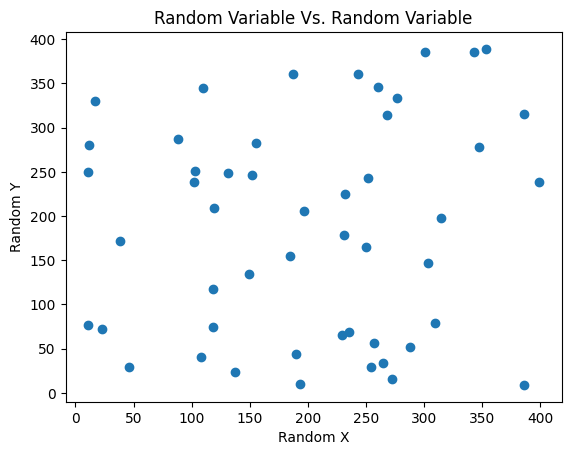

In [ ]:
x_range = np.random.randint(400, size=50)
y_range = np.random.randint(400, size=50)

plt.scatter(x_range, y_range)
plt.title("Random Variable Vs. Random Variable")
plt.xlabel("Random X")
plt.ylabel("Random Y")
plt.show()

#### **Problem #2.1.2**

Given the following scatter plot, add the following labels and title:
* `Title`: "Distance vs Workout Duration"
* `X-axis`: "Distance (km)"
* `Y-axis`: "Workout Duration (min)"

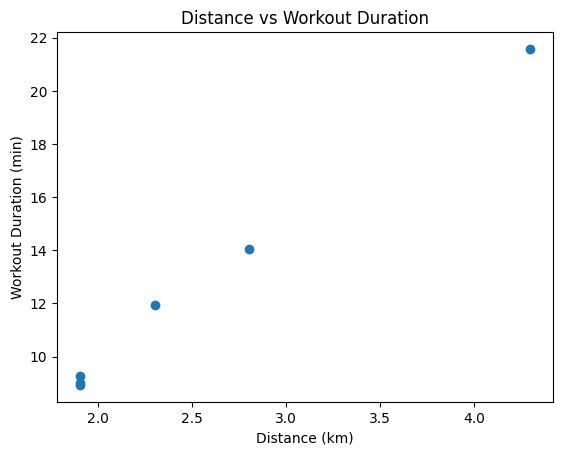

In [ ]:
workout_df = pd.DataFrame({"date": ["10/17/21", "11/04/21", "11/18/21", "11/23/21", "11/28/21", "11/29/21"],
           "distance_km": [4.3, 1.9, 1.9, 1.9, 2.3, 2.8],
           "duration_min": [21.58, 9.25, 9.0, 8.93, 11.94, 14.05],
           "delta_last_workout":[1, 18, 14, 5, 5, 1],
           "day_category": [0, 1, 1, 0, 0, 0]})

# creating scatter
x = workout_df['distance_km']
y = workout_df['duration_min']

plt.title("Distance vs Workout Duration")
plt.xlabel("Distance (km)")
plt.ylabel("Workout Duration (min)")
plt.scatter(x, y)
plt.show()

#### **Problem #2.1.3**

Create a scatter plot for the following data. Make the title and labels the following:
* `Title`: "Age vs. height in teenagers"
* `X-axis`: "Age"
* `Y-axis`: "Height (in)"

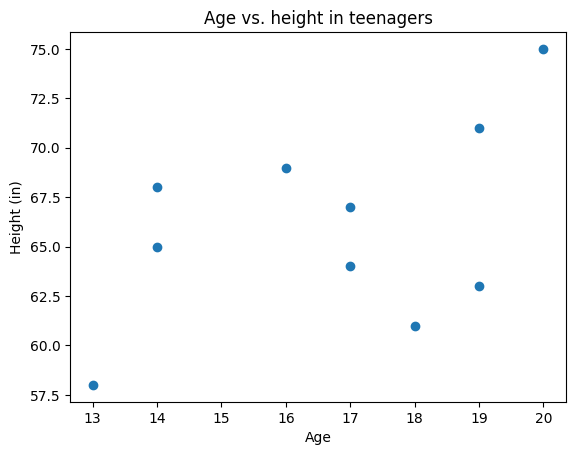

In [ ]:
age = [14, 14, 13, 18, 17, 20, 17, 16, 19, 19]
height = [65, 68, 58, 61, 64, 75, 67, 69, 71, 63] #in inches
plt.scatter(age, height)
plt.title("Age vs. height in teenagers")
plt.xlabel("Age")
plt.ylabel("Height (in)")
plt.show()

<a name="p2.2"></a>

---
### **Part 2.2: Line Plots**
---

#### **Problem #2.2.1**

Create a line plot for the following data. Add a title called "Bike Rideshare Activity" with x-axis and y-axis labels called "Month" and "Bike Trips", respectively.

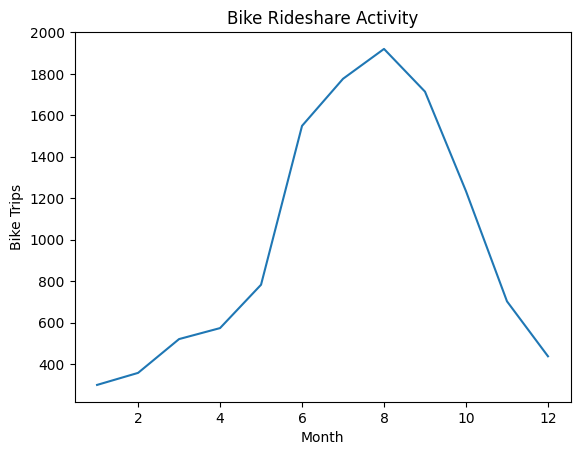

In [ ]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
trips = [300, 358, 521, 574, 783, 1549, 1776, 1920, 1714, 1234, 703, 438]
plt.plot(months, trips)
plt.title("Bike Rideshare Activity")
plt.xlabel("Month")
plt.ylabel("Bike Trips")
plt.show()

#### **Problem #2.2.2**

Create a line plot for the following data. Add a title called "Unemployment rate over the years" with x-axis and y-axis labels called "Year" and "Unemployment", respectively.

In [ ]:
Year = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
Unemployment_Rate = [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]

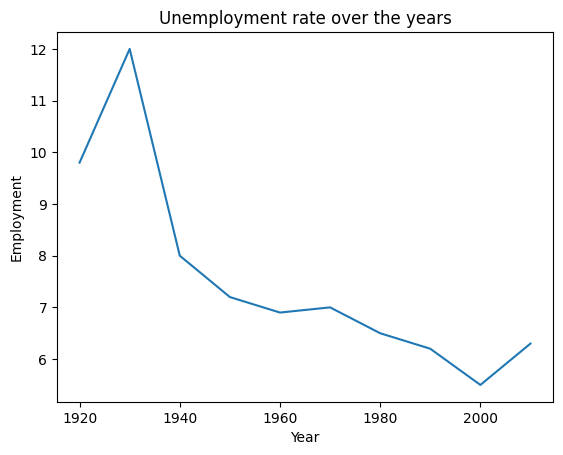

In [ ]:
plt.plot(Year, Unemployment_Rate)
plt.title("Unemployment rate over the years")
plt.xlabel("Year")
plt.ylabel("Employment")
plt.show()

#### **Problem #2.2.3**

The information below contains data related to how many people have visited Disney Parks globally. Create a line plot to show how the number of visits have changed between 2017 to 2020. Make sure you add in helpful labels and a title.

**Note:** Visitors is in millions. For example, in 2017, 150 million people visited Disney Parks globally.

In [ ]:
year = [2017, 2018, 2019, 2020]
visitors = [150, 157, 155.991, 43.525]

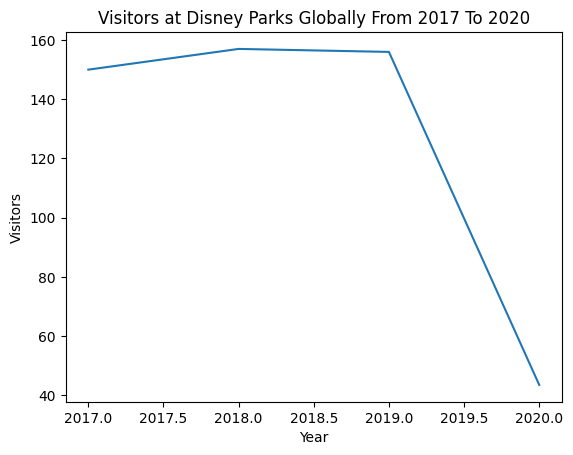

In [ ]:
plt.plot(year, visitors)
plt.title("Visitors at Disney Parks Globally From 2017 To 2020")
plt.xlabel("Year")
plt.ylabel("Visitors")
plt.show()

<a name="p2.3"></a>

---
### **Part 2.3: Bar Plots**
---

#### **Problem #2.3.1**

Now, plot the same data as above, but using a bar plot. In some cases, it may not be clear which plot will be best until you see your options!

In [ ]:
year = ['2017', '2018', '2019', '2020']
visitors = [150, 157, 155.991, 43.525]

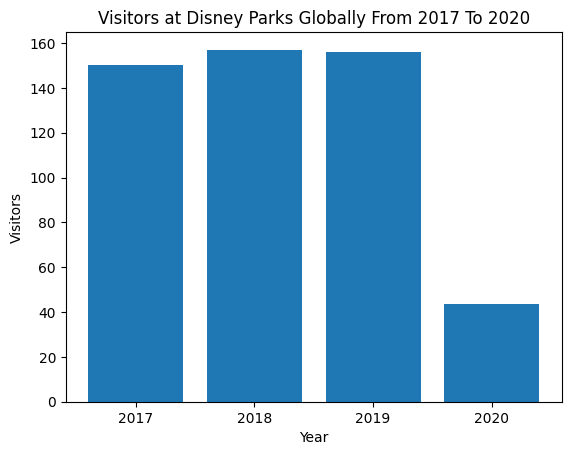

In [ ]:
plt.bar(year, visitors)
plt.title("Visitors at Disney Parks Globally From 2017 To 2020")
plt.xlabel("Year")
plt.ylabel("Visitors")
plt.show()

#### **Problem #2.3.2**

Create a bar plot for the following data. Add a title called "Favorite Types of Drinks" with x-axis and y-axis labels called "Drink" and "Number of People", respectively.

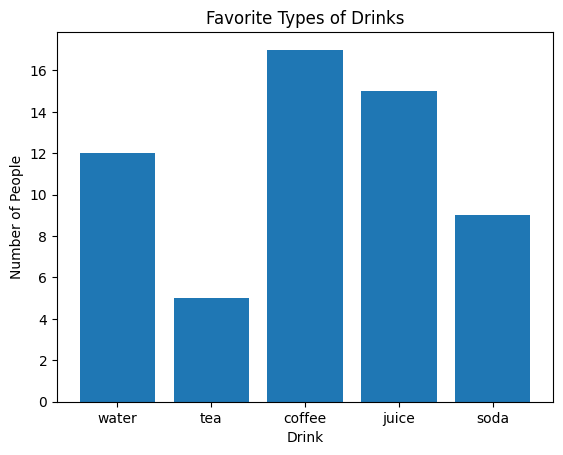

In [ ]:
drinks = ["water", "tea", "coffee", "juice", "soda"]
people = [12, 5, 17, 15, 9]

plt.bar(drinks, people)
plt.title("Favorite Types of Drinks")
plt.xlabel("Drink")
plt.ylabel("Number of People")
plt.show()

#### **Problem #2.3.3**

Create a bar plot using the DataFrame below. Add labels: `Innovative companies` for the title, `Countries` for the x-axis label, and `Number of Companies` for the y-axis label.

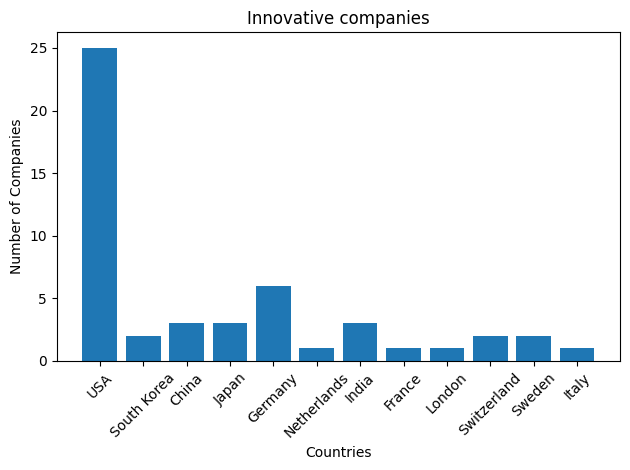

In [ ]:
companies_df = pd.DataFrame({"countries": ["USA", "South Korea", "China", "Japan", "Germany", "Netherlands", "India", "France", "London", "Switzerland", "Sweden", "Italy"],
             "companies": [25, 2, 3, 3, 6, 1, 3, 1, 1, 2, 2, 1]})

companies_df.head()

plt.bar(companies_df['countries'], companies_df['companies'])
plt.title("Innovative companies")
plt.xlabel("Countries")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a name="p2.4"></a>

---
### **Part 2.4: Improving Visualizations [OPTIONAL]**
---

#### **Problem #2.4.1**

Using the following data, create a line plot.

**Hint:** Your graph should have three distinct lines corresponding to `y1`, `y2`, and `y3`.

In addition:
* Make sure each line is a different color
* Make `y1` a dashed line
* Add a grid to the background and make the background color black
* Add a legend

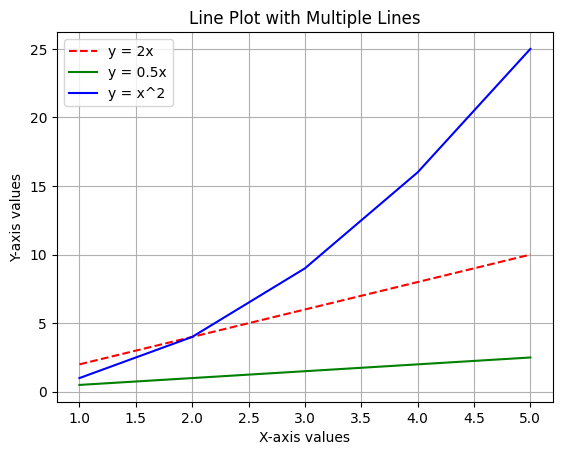

In [ ]:
# x axis values
x = [1,2,3,4,5]
# corresponding y axis values
y1 = [2,4,6,8,10] # y = 2x
y2 = [0.5,1,1.5,2,2.5] # y = 0.5x
y3 = [1,4,9,16,25] # y = x^2

plt.plot(x, y1, 'r--', label='y = 2x')
plt.plot(x, y2, 'g-', label='y = 0.5x')
plt.plot(x, y3, 'b-', label='y = x^2')
plt.legend()
plt.style.use('dark_background')
plt.grid(True)
plt.title('Line Plot with Multiple Lines')
plt.xlabel('X-axis values')
plt.ylabel('Y-axis values')
plt.show()

#### **Problem #2.4.2**

Using the following data, create a scatter plot. In addition:
* Make the data points green
* Change the transparency to 0.6
* Make the x-label `Temperature (Fahrenheit)` and in the font `fantasy`
* Make the y-label `Number of People` and in the font `fantasy`
* Make the title `Number of People at the Beach` and in the font `fantasy`

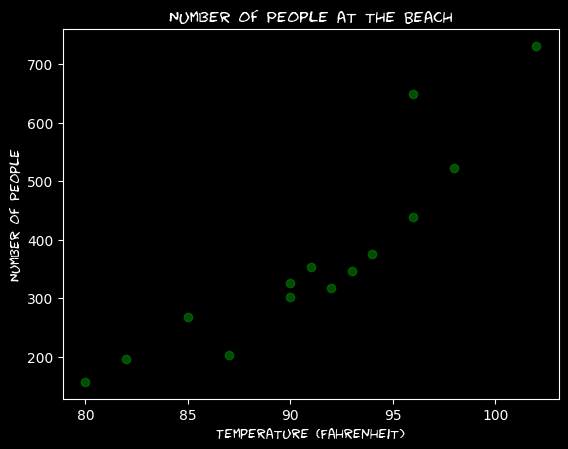

In [ ]:
# x axis values
x = [87, 94, 98, 102, 96, 90, 92, 93, 85, 82, 96, 80, 90, 91]
# corresponding y axis values
y = [204, 375, 522, 731, 439, 302, 317, 346, 268, 197, 649, 158, 327, 353]

plt.scatter(x, y, color='green', alpha=0.6)
plt.xlabel('Temperature (Fahrenheit)', fontname='fantasy')
plt.ylabel('Number of People', fontname='fantasy')
plt.title('Number of People at the Beach', fontname='fantasy')
plt.show()

#### **Problem #2.4.3**

Using the following data, create a bar plot. In addition:
* Make each bar's color the same as the color name
* Make the x-label `Favorite Color` and with a font size of 12
* Make the y-label `Number of People` and with a font size of 12
* Make the title `Number of People vs Favorite Color` and with a font size of 20
* Make the bar width 0.6

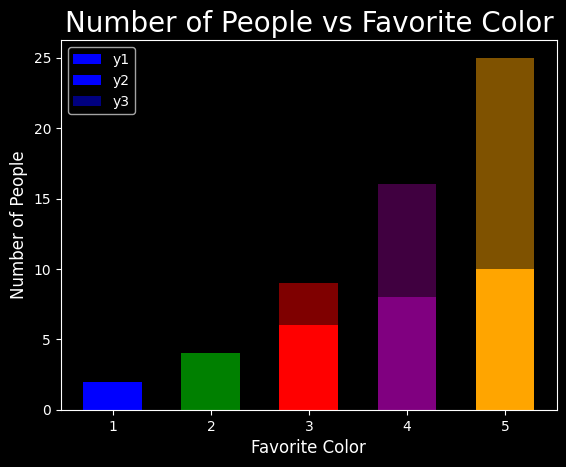

In [ ]:
# x axis values
x = [1,2,3,4,5]
# corresponding y axis values
y1 = [2,4,6,8,10]
y2 = [0.5,1,1.5,2,2.5]
y3 = [1,4,9,16,25]

colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.bar(x, y1, color=colors, width=0.6, label='y1')
plt.bar(x, y2, color=colors, width=0.6, label='y2')
plt.bar(x, y3, color=colors, width=0.6, label='y3', alpha=0.5)
plt.xlabel('Favorite Color', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Number of People vs Favorite Color', fontsize=20)
plt.legend()
plt.show()

#### **Problem #2.4.4**

Using the following data, create a line plot. In addition:
* Make line y1 brown and dashed, and make line y2 pink
* Add a grid to the background
* Add a legend
* Make the title `X vs Y` in font `monospace` and in size 18


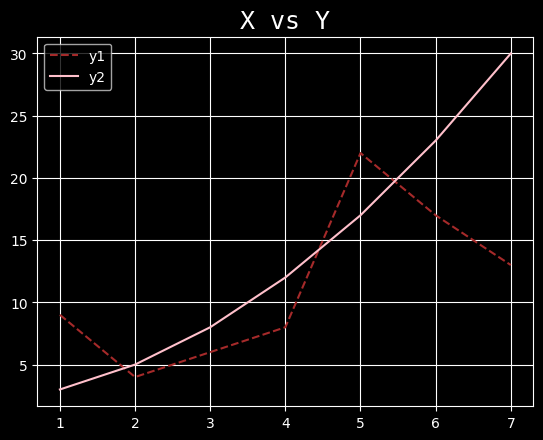

In [ ]:
# x axis values
x = [1,2,3,4,5,6,7]
# corresponding y axis values
y1 = [9, 4, 6, 8, 22, 17, 13]
y2 = [3, 5, 8, 12, 17, 23, 30]

plt.plot(x, y1, 'brown', linestyle='--', label='y1')
plt.plot(x, y2, 'pink', label='y2')
plt.grid(True)
plt.legend()
plt.title('X vs Y', fontname='monospace', fontsize=18)
plt.show()

#### **Problem #2.4.5**

Create a bar plot for the following data with the following:
* One bar showing the number of females in the dataset and another bar showing the number of males in the dataset.
* Bars labeled 'Female' and 'Male'.
* The y-axis labeled 'Number in Dataset' with extra large font.
* A title called "Number of Males and Females in the Dataset" with extra large font.

<br>

**Hint**: You will need to use pandas functions to get the count of males and females in the data frame.

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSa0metcKBFqn-MHLn05vVGWONMlzljcWa-xIM1wJPXIa5kbrmIzGqmWcMh8eKG_ntByF9qqn6Mx3MT/pub?gid=1052859518&single=true&output=csv'
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heart attack
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,30,0,1,170,237,0,1,170,0,0.0,0
3,31,0,2,100,219,0,1,150,0,0.0,0
4,32,0,2,105,198,0,0,165,0,0.0,0


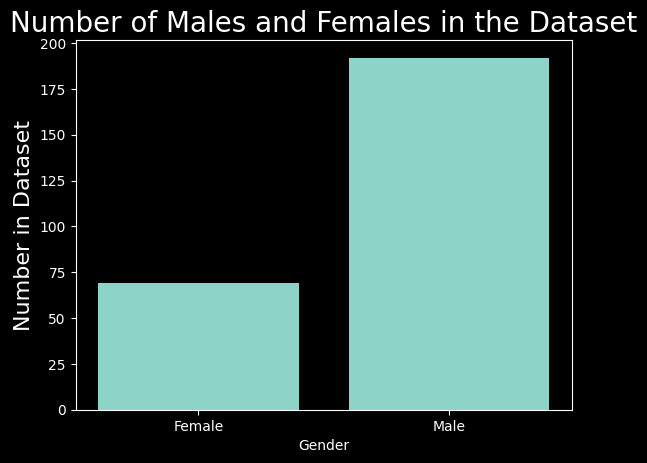

In [ ]:
female_count = df[df['sex'] == 0].shape[0]
male_count = df[df['sex'] == 1].shape[0]
plt.bar(['Female', 'Male'], [female_count, male_count])
plt.xlabel('Gender')
plt.ylabel('Number in Dataset', fontsize=16)
plt.title('Number of Males and Females in the Dataset', fontsize=20)
plt.show()

#### **Problem #2.4.6**

Create a *grouped* bar plot for the following data with the following:
* One bar graph showing the number of females with heart attacks and without in the dataset.
* This bar graph should be labeled 'Female' for the legend.
* Another bar graph showing the number of males with heart attacks and without in the dataset.
* This bar graph should be labeled 'Male' for the legend.
* Both bar graphs should be located on the x-axis and given a width to make the graph readable.
* The y-axis labeled 'Number in Dataset' with extra large font.
* A title called "Breakdown of Heart Attacks by Sex" with extra large font.

<br>

**Hint**: You will need to use pandas functions and comparisons to get the count of males and females with and without heart attacks in the data frame.

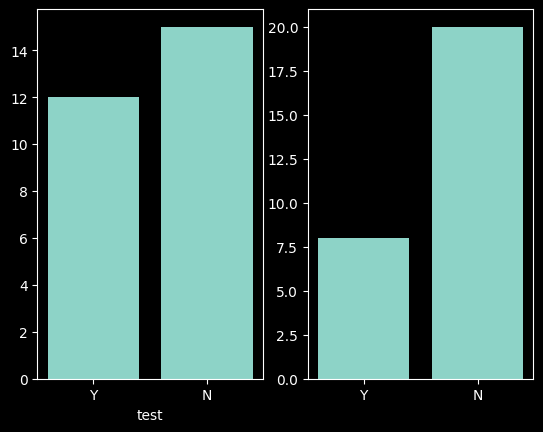

In [ ]:
plt.figure()
ax1 = plt.subplot(121)
bar1 = ax1.bar(['Y', 'N'], [12, 15])
ax1.set_xlabel("test")
ax2 = plt.subplot(122)
bar = ax2.bar(['Y', 'N'], [8, 20])
plt.show()

#### **Comment on this Dataset**

This is an unfortunately common case of biased data, specifically *unbalanced data*, leading to potentially harmful results. We could attempt removing `'Sex'` as a feature to blind any ML models to the sex of the patient. However, bias often runs deeper than the most superficial variables and may be correlated with others in ways that humans and especially advanced ML algorithms can still pick up on. Consider some of the following ideas for improving on these results:

* Using statistical methods for balancing the data. For instance, upsampling and downsampling are common first approaches to tackling this problem.

* Find a dataset that is more balanced to begin with. In an ideal world, we would make sure that the data is balanced (representative) upon collection.

<a name="p3"></a>

---
## **Part 3: Linear Regression**
---

Using the  dataset, do the following:
* Build a model that can predict the total number of bike rentals.
* Use a different subset of features to build another model to predict the total number of bike rentals and compare the results.

<br>

The Bike Sharing dataset contains information about hourly bike rental data spanning two years, provided by a bike-sharing system in Washington, D.C. The dataset includes factors such as weather, date, time, and user information.

The features are as follows:
* `instant`: A unique identifier for each record in the dataset.
* `dteday`: The date of the bike rental in the format yyyy-mm-dd.
* `season`: The season of the year (1: spring, 2: summer, 3: fall, 4: winter).
* `yr`: The year (0: 2011, 1: 2012).
* `mnth`: The month of the year (1 to 12).
* `hr`: The hour of the day (0 to 23).
* `holiday`: A binary indicator of whether it is a holiday or not (0: not a holiday, 1: holiday).
* `weekday`: The day of the week (0: Sunday, 1: Monday, ..., 6: Saturday).
* `workingday`: A binary indicator of whether it is a working day or not (0: weekend or holiday, 1: working day).
* `weathersit`: The weather situation (1: clear, 2: misty/foggy, 3: light rain/snow, 4: heavy rain/snow).
* `temp`: The temperature in Celsius.
* `atemp`: The "feels like" temperature in Celsius.
* `hum`: The humidity level.
* `windspeed`: The wind speed.
* `casual`: The count of casual bike rentals.
* `registered`: The count of registered bike rentals.
* `cnt`: The total count of bike rentals (casual + registered).

#### **Step #1: Load in Data**

**Run the code below to load the data.**

In [ ]:
# Import required libraries
import urllib.request
import zipfile

# Download the zip file and extract the CSV file(s)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
filename = "Bike-Sharing-Dataset.zip"
urllib.request.urlretrieve(url, filename)
with zipfile.ZipFile(filename, "r") as zip_ref:
    zip_ref.extractall()

# Read the CSV file(s) into Pandas dataframes
hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

# Combine the two dataframes into a single dataframe
bikes_df = pd.concat([hour_df, day_df], ignore_index=True).drop(columns = ['instant', 'dteday', 'casual', 'hr'])


bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


#### **Step #2: Choose your Variables**

We are using all available features to predict `cnt`.


In [ ]:
inputs = bikes_df[['temp', 'atemp', 'hum', 'windspeed']]
output = bikes_df['cnt']

#### **Step #3: Split your Data**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)

#### **Step #4: Import an ML Algorithm**




In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize the Model**


In [ ]:
model = LinearRegression()

#### **Step #6: Fit, Test, and Visualize**


In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

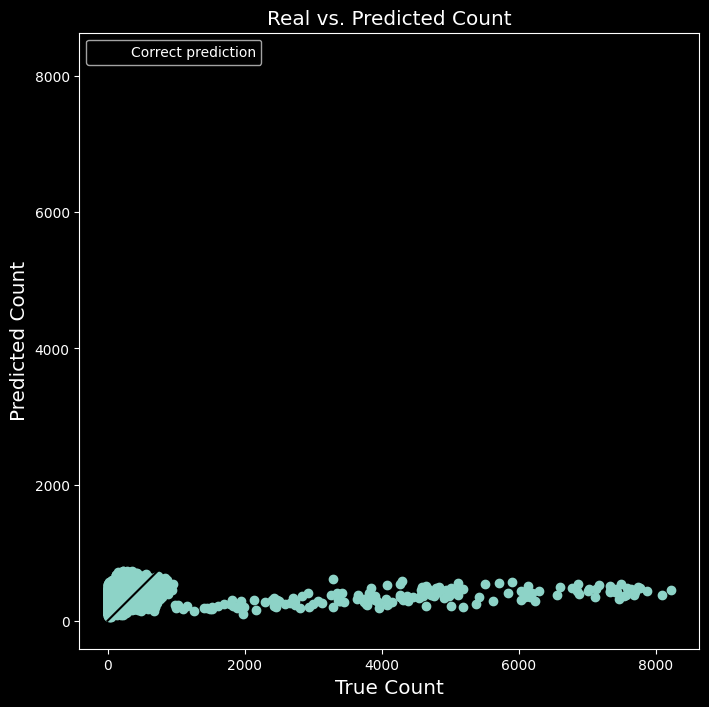

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label="Correct prediction")


plt.xlabel('True Count', fontsize = 'x-large')
plt.ylabel('Predicted Count', fontsize = 'x-large')
plt.title("Real vs. Predicted Count", fontsize = 'x-large')
plt.legend()

plt.show()

#### **Step #7: Evaluate**

Let's evaluate this model and put it to the test! Specifically, evaluate the model using our standard regression metrics: $R^2$, MSE, and MAE.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, predictions))
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))

0.01390827042677667
928320.6166827882
374.86439944610015


<a name="p4"></a>

---
## **Part 4: KNN**
---

In this section, you will create a 5NN model for the stars dataset.

#### **Step #1: Load in Data**

**Run the code below to load the data.**

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTCZgoegOHa49SFXYU-ZZTdCkgTp0sneU1BsEOa7vusjTXPPLcn0i3kXhX1nyqkApJHCKTkw0mWuWr4/pub?gid=753880827&single=true&output=csv'
stars_df = pd.read_csv(url)

# Convert class values to more meaningful labels
star_map = {0: 'red dwarf', 1: 'brown dwarf', 2: 'white dwarf', 3: 'main sequence', 4: 'super giant', 5: 'hyper giant'}
stars_df['class'] = stars_df['class'].map(star_map)

# Encode color feature so we can use it in our modeling
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
stars_df['color'] = enc.fit_transform(stars_df[['color']]).astype(int)



stars_df.head()

,temperature,brightness,size,color,class
0,3068,0.002400,0.1700,8,red dwarf
1,3042,0.000500,0.1542,8,red dwarf
2,2600,0.000300,0.1020,8,red dwarf
3,2800,0.000200,0.1600,8,red dwarf
4,1939,0.000138,0.1030,8,red dwarf


#### **Step #2: Choose your Variables**



In [ ]:
inputs = stars_df[['temperature', 'brightness', 'size', 'color']]
output = stars_df['class']

#### **Step #3: Split your Data**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.1, random_state=42)

#### **Step #4: Import an ML Algorithm**




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### **Step #5: Initialize the Model**

Use K = 5 here.

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)

#### **Step #6: Fit and Test**


In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predictions = model.predict(X_test)

#### **Step #7: Evaluate**

Let's evaluate this model and put it to the test! Specifically, use the accuracy score to get a simple overall picture of your model's performance, and the confusion matrix to get a more nuanced view of where the model is performing the best and worst


In [ ]:
print(accuracy_score(y_test, predictions))

0.7083333333333334


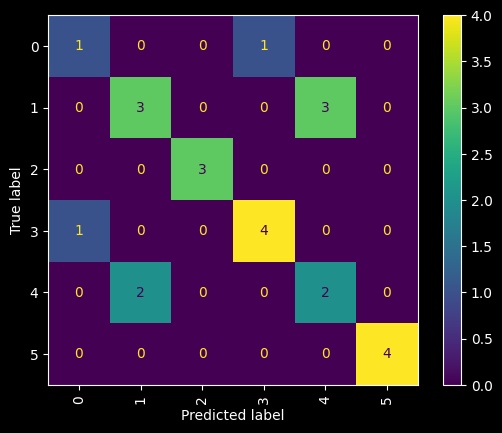

In [ ]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.xticks(rotation=90)
plt.show()

#### **Step \#8: Make predictions**


Astronomers have heard of your amazing ML model for predicting star types and want you to help them categorize new stars they have observed! For each problem below, use your KNN model to classify the stars based on the data given to you.


The stars' `temperature`, `brightness`, `size`, and `color` are as follows:

1. `10500`, `107200`, `240`, `6`.

2. `10500`, `107200`, `240`, `0`.

3. `1900`, `0.0001`, `0.01`, `3`.

4. `9000`, `100`, `10`, `3`.

In [ ]:
new_star = [[10500, 107200, 240, 6]]
model.predict(new_star)

array(['hyper giant'], dtype=object)

In [ ]:
new_star = [[10500, 107200, 240, 0]]
model.predict(new_star)

array(['hyper giant'], dtype=object)

In [ ]:
new_star = [[1900, 0.0001, 0.01, 3]]
model.predict(new_star)

array(['red dwarf'], dtype=object)

In [ ]:
new_star = [[9000, 100, 10, 3]]
model.predict(new_star)

array(['main sequence'], dtype=object)

<a name="p5"></a>

---
## **Part 5: K-Folds Cross Validation**
---

In this section, you will explore how to use K-Folds to evaluate and compare models before deciding on the final model you will use. Only once you have selected your final model should you evaluate it on the test set.

<br>

In particular, you will use K-Folds Cross Validation to determine the best model for the stars dataset.

<br>

**NOTE**: This section assumes you have run the sections above, specifically Steps #1 - 3.

#### **Problem #5.1**

Let's take the proper and more insightful approach: evaluating the model using K-Folds Cross Validation. Complete the code below to evaluate a 5NN model using 10-Folds Cross Validation.

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

scores_5 = cross_val_score(knn_5, X_train, y_train, cv = 10)
print("10-Folds CV Scores: " + str(scores_5.mean()) + " +/- " + str(scores_5.std()))

10-Folds CV Scores: 0.6632034632034631 +/- 0.07812743502698717


#### **Visualize the scores by running the cell below.**

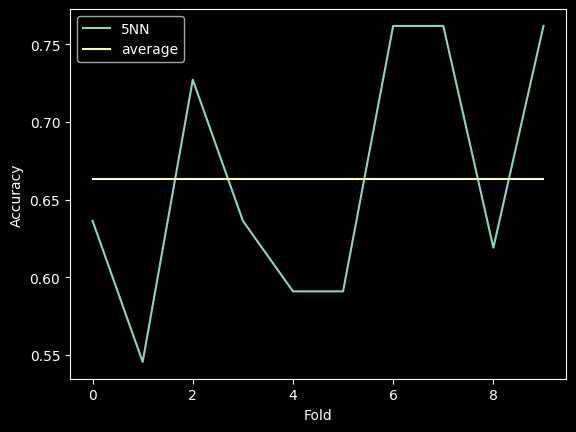

In [ ]:
plt.plot(scores_5, label = '5NN')
plt.plot([scores_5.mean() for i in range(10)], label = 'average')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### **Problem #5.2**

Now, use 10-Folds Cross Validation to evaluate and compare to the following models:
1. 1NN
2. 11NN (**NOTE**: $\sqrt{\text{length of training data}} \approx 11$)
3. 99NN
4. Logistic Regression

<br>

**NOTE**: There is code at the end that will visualize all of these results together.


##### **1. 1NN**

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=1)

scores_1 = cross_val_score(knn_1, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_1.mean()) + " +/- " + str(scores_1.std()))

10-Folds CV Scores: 0.7181818181818181 +/- 0.09272965748890782


##### **2. 11NN (**NOTE**: $\sqrt{\text{length of training data}} \approx 11$)**

In [ ]:
knn_11 = KNeighborsClassifier(n_neighbors=11)

scores_11 = cross_val_score(knn_11, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_11.mean()) + " +/- " + str(scores_11.std()))

10-Folds CV Scores: 0.6207792207792208 +/- 0.10558156681619835


##### **3. 99NN**

In [ ]:
knn_99 = KNeighborsClassifier(n_neighbors=99)

scores_99 = cross_val_score(knn_99, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_99.mean()) + " +/- " + str(scores_99.std()))

10-Folds CV Scores: 0.35757575757575755 +/- 0.07644585300309649


##### **4. Model of Your Choosing**

In [ ]:
knn_33 = KNeighborsClassifier(n_neighbors=33)

scores_33 = cross_val_score(knn_33, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_33.mean()) + " +/- " + str(scores_33.std()))

10-Folds CV Scores: 0.5651515151515151 +/- 0.06939550570346834


#### **Visualize the scores by running the cell below.**

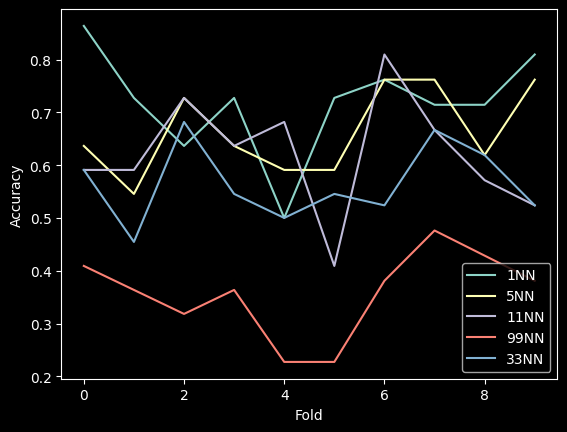

In [ ]:
plt.plot(scores_1, label = '1NN')
plt.plot(scores_5, label = '5NN')
plt.plot(scores_11, label = '11NN')
plt.plot(scores_99, label = '99NN')
plt.plot(scores_33, label = '33NN')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### **Problem #5.3**

Assuming you do not plan to try out any other models, you can safely train your final model and evaluate it on the test set. Consider the average, standard deviation, and individual scores you visualized to pick one of the models from above and:
* Train it on the entire training set.
* Evaluate it on the test set with a classification report.


In [ ]:
model = knn_1
model.fit(X_train, y_train)
predictions = model.predict(X_test)
classification_report(y_test, predictions)

'               precision    recall  f1-score   support\n\n  brown dwarf       0.00      0.00      0.00         2\n  hyper giant       0.50      0.33      0.40         6\nmain sequence       1.00      1.00      1.00         3\n    red dwarf       0.60      0.60      0.60         5\n  super giant       0.33      0.50      0.40         4\n  white dwarf       1.00      1.00      1.00         4\n\n     accuracy                           0.58        24\n    macro avg       0.57      0.57      0.57        24\n weighted avg       0.60      0.58      0.58        24\n'

### **Reflection questions**
Answer the following questions:

1. Which of the five models had the highest performance during cross validation?

2. Which of the five models had the lowest performance during cross validation?

3. How do the top performing model's cross validation metrics compare to the test metrics? In other words, how does this model perform in Problem #5.2 versus #5.3?

# **Global Life Expectancy Project**
---

### **Description**
In this project, you will apply what you have learned this semester to analyze a dataset containing information on factors influencing life expectancy in a variety of countries. You are tasked with performing exploratory data analysis and creating detailed visualizations. You will then train machine learning models to predict the life expectancy of countries and classify them based on development status.


<br>

###**About the Dataset**

Below is a list of variables in this dataset. You may not understand the meaning of every single variable. It is typical for ML practitioners to go into a project unaware of the full context within which their data lives. As you go through this project, consider if it would be helpful to learn more about any information you are unfamiliar with.

* `Country`: name of country
* `Region`: region the country is in
* `Year`: year (observed from 2000-2015)
* `Infant_deaths`: represents infant deaths per 1000 population
* `Under_five_deaths`: represents deaths of children under five years old per 1000 population
* `Adult_mortality`: represents deaths of adults per 1000 population
* `Alcohol_consumption`: represents alcohol consumption recorded in liters of pure alcohol per capita with 15+ years old
* `Hepatitis_B`: represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds
* `Measles`: represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds
* `BMI`: average body mass index of entire population
* `Polio`: represents % of coverage of Polio (Pol3) immunization among 1-year-olds
* `Diphtheria`: represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds
* `Incidents_HIV`: incidents of HIV per 1000 population aged 15-49
* `GDP_per_capita`: gross domestic product (GDP) per capita (in USD)
* `Population_mln`: total population of the country in millions
* `Thinness_ten_nineteen_years`: prevalence of thinness among adolescents aged 10-19 years as a percentage; BMI < -2 standard deviations below the median
* `Thinness_five_nine_years`: prevalence of thinness among children aged 5-9 years as a percentage; BMI < -2 standard deviations below the median
* `Schooling`: average years that people aged 25+ spent in formal education
* `Economy_status_Developed`: whether or not it is a developed country (0: no, 1: yes)
* `Economy_status_Developing`: whether or not it is a developing country (0: no, 1: yes)
* `Life_expectancy`: average life expectancy in age

<br>

### **Key questions to answer:**
1. Which preprocessing steps contribute to your model's predictive performance?
2. Can you observe any patterns in the dataset from your visualizations?
3. What features most strongly predict a country's life expectancy?
4. What features most strongly predict a country's economic development status?
5. How do KNN and Linear Regression compare when both are used?

<br>

### **Goals:**
By the end of these projects, you will have:
1. Visualized relationships between various variables in the data.
2. Visualized the behavior of variables across features (e.g. grouped bar graphs, etc.).
3. Implemented linear regression and KNN models tuned to best fit this dataset for a variety of tasks.

<br>

### **Lab Structure**
**Part 1**:  [Data Exploration, Wrangling, and Visualization](#p1)

**Part 2**:  [Predicting Life Expectancy](#p2)

> **Part 2.1**:  [Using All Numerical Features and Standardization](#p2.1)

> **Part 2.2**:  [Using All Numerical Features and Normalization](#p2.2)

> **Part 2**:  [Wrapup](#p2w)

**Part 3**:  [Predicting Development Status](#p3)

> **Part 3**:  [Wrapup](#p3w)


</br>

### **Resources**
* [Python Basics Cheat Sheet](https://docs.google.com/document/d/1bMqW8SKR6xC0-d1f0hb-DnYPJ0CyszjiwPCovAl9TLc/edit?usp=drive_link)

* [EDA with pandas Cheat Sheet](https://docs.google.com/document/d/1xnKJsii1AsRH2t22XtrAh7FzSFGqAR0hAmW4oLYM4MI/edit?usp=drive_link)

* [Data Visualization with matplotlib Cheat Sheet](https://docs.google.com/document/d/1_3hzeIBPvcT6VC-eK-DDGVsKUvdVSvylNepoSLn2-T4/edit?usp=drive_link)

* [Linear Regression with sklearn Updated Cheat Sheet](https://docs.google.com/document/d/1DPUqouqGKeAYBfNBoHNsKRoQGXfD7mjUAvjjK0VsLbc/edit?usp=drive_link)

* [K-Nearest Neighbors with sklearn Cheat Sheet](https://docs.google.com/document/d/1QltUCIlM0FOkalov1aPXOkOVQme3Ot1AUThiSUbh-kI/edit?usp=drive_link)

* [Feature Scaling and K-Folds Cross Validation with sklearn Cheat Sheet](https://docs.google.com/document/d/1XCYdpH4jtrbKtCQvNRQPKI5H_UWFg4LiPdZ4qabHmfo/edit?usp=drive_link)


<br>

**Before starting, run the code below to import all necessary functions, libraries, and data.**

In [ ]:
#!pip install scikit-learn

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier


life_df = pd.read_csv("https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/Life-Expectancy-Data-Updated.csv")

<a name="p1"></a>

---
## **Part 1: Data Preparation**
---
In this section, you will conduct data exploration and visualization.


### **Problem #1.1**

Explore the dataset. This is your opportunity to become familiar with the data. Investigate the dataset's structure and examine different features.

In [ ]:
life_df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


### **Problem #1.2**

Run the code below. This command will drop any duplicate rows within the entire dataset.



In [ ]:
life_df.drop_duplicates(inplace = True)

**Note:** the original dataset had some data points that contained null values. These missing values were imputed with either the 3-year average for the country or the average of all countries in that region. Furthermore, countries that were missing more than 4 data columns were omitted from the dataset.

### **Problem #1.3**

Determine the mean and standard deviation of the numerical variables and assess if scaling will be necessary before modeling or if the features are already close in scale.



In [ ]:
life_df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


### **Problem #1.4**

Create separate scatterplots for each of the following relationships:

1. `Adult_mortality` and `Life_expectancy`.
2. `Alcohol_consumption` and `Life_expectancy`.
3. `GDP_per_capita` and `Life_expectancy` with each `Region` colored differently.
4. `Population_mln` and `Life_expectancy` with each `Region` colored differently.
5. `Schooling` and `Life_expectancy` with each `Region` colored differently.

<br>

**Make sure to include a meaningful title, x-label, y-label, and legend for all plots.**

#### **1. `Adult_mortality` and `Life_expectancy`.**

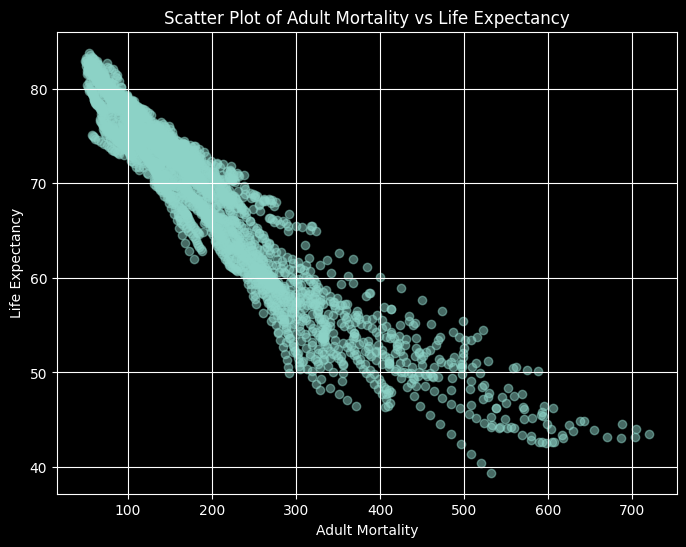

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(life_df['Adult_mortality'], life_df['Life_expectancy'], alpha=0.5)
plt.title('Scatter Plot of Adult Mortality vs Life Expectancy')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

#### **2. `Alcohol_consumption` and `Life_expectancy`.**

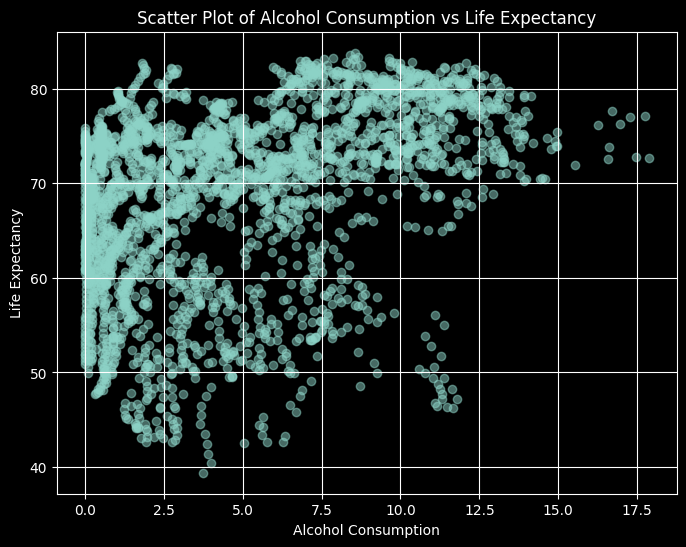

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(life_df['Alcohol_consumption'], life_df['Life_expectancy'], alpha=0.5)
plt.title('Scatter Plot of Alcohol Consumption vs Life Expectancy')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

#### **3. `GDP_per_capita` and `Life_expectancy` with each `Region` colored differently.**

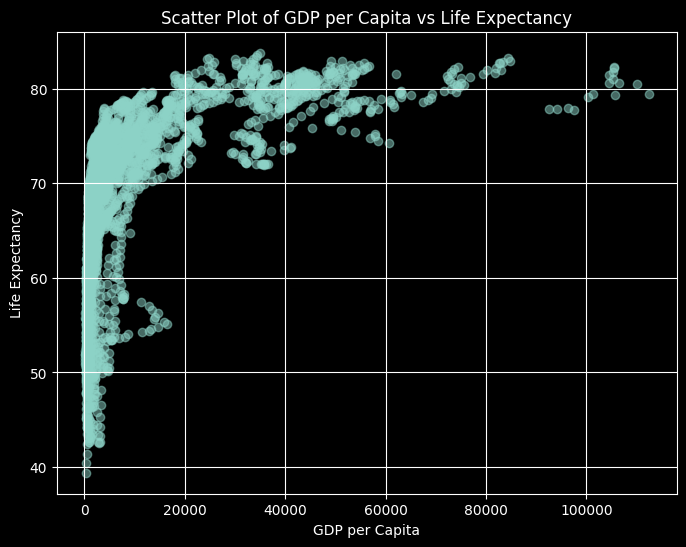

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(life_df['GDP_per_capita'], life_df['Life_expectancy'], alpha=0.5)
plt.title('Scatter Plot of GDP per Capita vs Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

#### **4. `Population_mln` and `Life_expectancy` with each `Region` colored differently.**

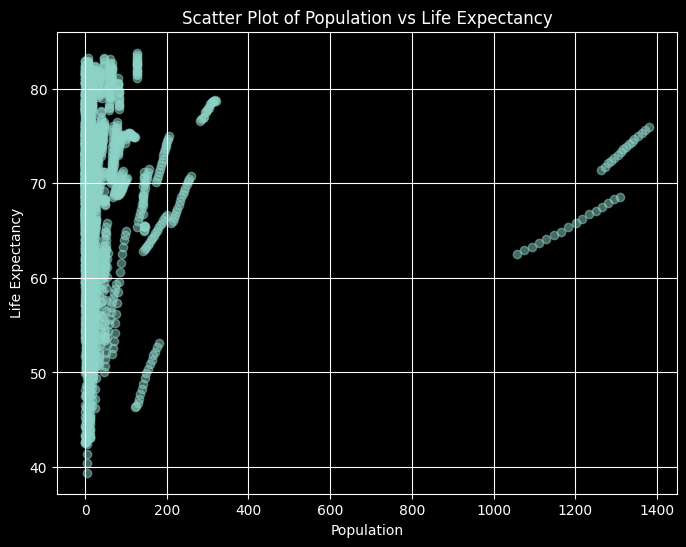

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(life_df['Population_mln'], life_df['Life_expectancy'], alpha=0.5)
plt.title('Scatter Plot of Population vs Life Expectancy')
plt.xlabel('Population')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

#### **5. `Schooling` and `Life_expectancy` with each `Region` colored differently.**

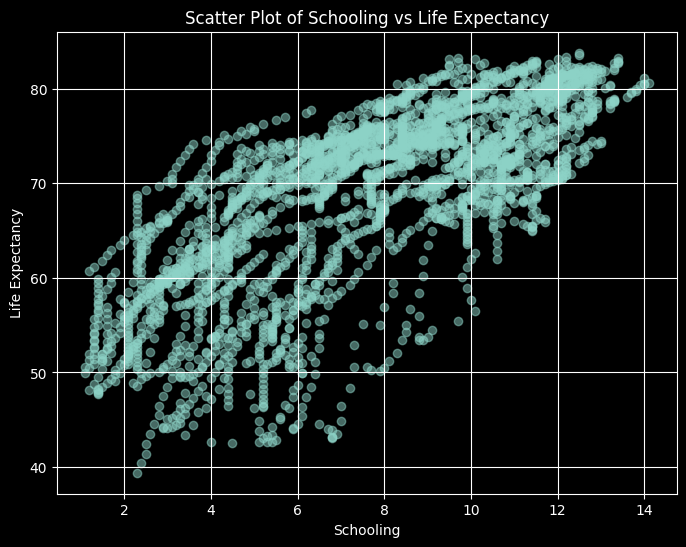

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(life_df['Schooling'], life_df['Life_expectancy'], alpha=0.5)
plt.title('Scatter Plot of Schooling vs Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

<a name="p2"></a>

---
## **Part 2: Predicting Life Expectancy**
---

Now you will create, evaluate, and train a machine learning model to predict the average `Life_expectancy` of a country based on the provided numerical features. It is up to you to determine if you should use Linear Regression or KNN. If it is possible to use multiple models and/or multiple hyperparameter values, you should use and compare all possible options within reason (ex: don't try more than 4-5 models for a given part).

<br>

You will satisfy each of the following:

**Part 2.1**: Using All Numerical Features and Label Encodings

**Part 2.2**: Using All Numerical Features and Dummy Variable Encodings

**Part 2.3**: Using the 4 Best Numerical Features and the Best Encodings Where Relevant

<br>

Don't forget to follow the 8 step process for implementing machine learning models!

<a name="p2.1"></a>

---
### **Part 2.1: Using All Numerical Features and Standardization**
---

#### **Step #1: Load the data**

This was completed in the beginning.

#### **Step #2: Determine the independent and dependent variables**

**NOTE**: Identify all numerical features. Since `'Country'` is unique for each data point, this is not a useful feature. As such, this should not be included in your features.

In [ ]:
features = life_df[['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed', 'Economy_status_Developing']]
label = life_df['Life_expectancy']

#### **Step #3: Split data into training and testing data**

During this step you should:
1. Split the data using the conventional 80/20 split.
2. Standardize the data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#### **Step #4: Import the algorithm**

It's up to you whether this should be Linear Regression or KNN.

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5:  Initialize the model and set hyperparameters**


In [ ]:
model_1 = LinearRegression()

#### **Steps #6 - 7: Fit your model, evaluating using 10-Folds Cross Validation. Create a visualization if applicable**

Specifically,

1. Determining an average relevant evaluation metric using 10-Folds Cross Validation.
2. Visualize the results of cross validation.
3. Train a model to use for predictions below. **NOTE**: Do *not* use the test set at any point in this section.

##### **1. Fit the model to the training data, determining an average relevant evaluation metric using 10-Folds Cross Validation.**


**NOTE**: The y-data in this section is still in the form of a pandas DataFrame, so to access a specific index you need to use `.iloc[...]`.

In [ ]:
model_1.fit(X_train, y_train)
score_1 = model_1.predict(X_test)
cv_scores = cross_val_score(model_1, features, label, cv=10, scoring='r2')

##### **2. Visualize the results.**

Plot the performance results.

<br>

**NOTE**: As we plot more and more on the same figure, it can be helpful to move the legend off the plot. You can use and modify the following code to accomplish this: `plt.legend(bbox_to_anchor=(1.1, 1.05))` instead of `plt.legend()`.

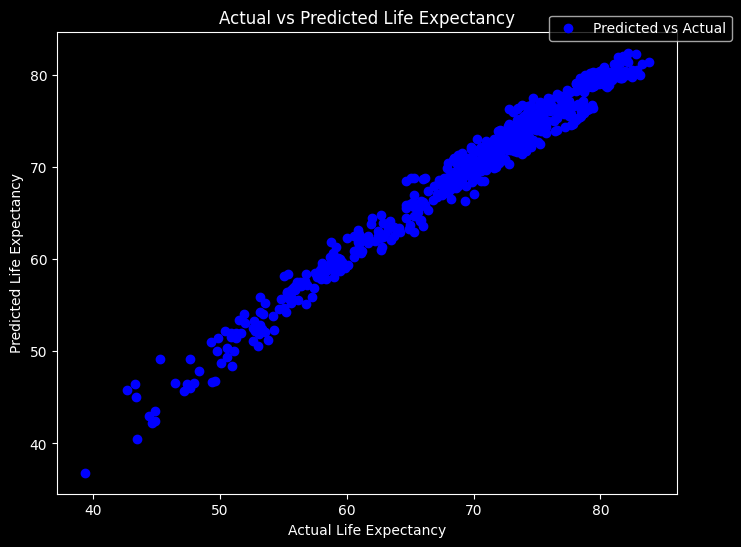

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, score_1, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


##### **3. Train a model to use for predictions below.**

In [ ]:
model_1.fit(X_train, y_train)

LinearRegression()

#### **Step #8: Use the model**

Specifically,

1. Predict the average life expectancy of two new countries.

2. *If you used linear regression*, look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the life expectancy of these new countries:**

**Country 1**

* `Region`: `Africa`
* `Year`: 2012
* `Infant_deaths`: 32
* `Under_five_deaths`: 41
* `Adult_mortality`: 417
* `Alcohol_consumption`: 1.2
* `Hepatitis_B`: 74
* `Measles`: 68
* `BMI`: 21
* `Polio`: 76
* `Diphtheria`: 71
* `Incidents_HIV`: 12.2
* `GDP_per_capita`: 56824
* `Population_mln`: 112
* `Thinness_ten_nineteen_years`: 7
* `Thinness_five_nine_years`: 11
* `Schooling`: 9
* `Economy_status_Developed`: 0
* `Economy_status_Developing`: 1

<br>

**Country 2**

* `Region`: `North America`
* `Year`: 2012
* `Infant_deaths`: 121
* `Under_five_deaths`: 63
* `Adult_mortality`: 269
* `Alcohol_consumption`: 2.7
* `Hepatitis_B`: 87
* `Measles`: 81
* `BMI`: 27
* `Polio`: 88
* `Diphtheria`: 88
* `Incidents_HIV`: 2.6
* `GDP_per_capita`: 73451
* `Population_mln`: 341
* `Thinness_ten_nineteen_years`: 4
* `Thinness_five_nine_years`: 7
* `Schooling`: 13
* `Economy_status_Developed`: 1
* `Economy_status_Developing`: 0

<br>

**NOTE**: You will need to use your `StandardScaler` to transform these new points *and* you will need to determine how these countries are represented in this given encoding.

In [ ]:
new_country_data = pd.DataFrame({
    'Infant_deaths': [32],
    'Under_five_deaths': [41],
    'Adult_mortality': [417],
    'Alcohol_consumption': [1.2],
    'Hepatitis_B': [74],
    'Measles': [68],
    'BMI': [21],
    'Polio': [76],
    'Diphtheria': [71],
    'Incidents_HIV': [12.2],
    'GDP_per_capita': [56824],
    'Population_mln': [112],
    'Thinness_ten_nineteen_years': [7],
    'Thinness_five_nine_years': [11],
    'Schooling': [9],
    'Economy_status_Developed': [0],
    'Economy_status_Developing': [1]
})
scaled_new_country_data = scaler.transform(new_country_data)
scaled_new_country_df = pd.DataFrame(scaled_new_country_data, columns=new_country_data.columns)
life_expectancy_prediction = model_1.predict(scaled_new_country_df)
print("Predicted Life Expectancy:", life_expectancy_prediction[0])

Predicted Life Expectancy: 84.62177513707896


In [ ]:
new_country_data = pd.DataFrame({
    'Infant_deaths': [121],
    'Under_five_deaths': [63],
    'Adult_mortality': [269],
    'Alcohol_consumption': [2.7],
    'Hepatitis_B': [87],
    'Measles': [81],
    'BMI': [27],
    'Polio': [88],
    'Diphtheria': [88],
    'Incidents_HIV': [2.6],
    'GDP_per_capita': [73451],
    'Population_mln': [341],
    'Thinness_ten_nineteen_years': [4],
    'Thinness_five_nine_years': [7],
    'Schooling': [13],
    'Economy_status_Developed': [1],
    'Economy_status_Developing': [0]
})
scaled_new_country_data = scaler.transform(new_country_data)
scaled_new_country_df = pd.DataFrame(scaled_new_country_data, columns=new_country_data.columns)
life_expectancy_prediction = model_1.predict(scaled_new_country_df)
print("Predicted Life Expectancy:", life_expectancy_prediction[0])

Predicted Life Expectancy: 85.63314279342165


##### **2. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_1.coef_
intercept = model_1.intercept_

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Life_expectancy"])

In [ ]:
print("Coefficients:")
coefficients.head()

Coefficients:


,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
0,-0.053996,-0.051421,-0.048288,0.063698,-0.008166,0.001894,-0.129465,0.002054,0.001845,0.095355,0.000024,-0.000122,-0.034316,0.001099,0.092956,0.349474,-0.349474


In [ ]:
print("\nIntercept:")
intercept.head()


Intercept:


,Life_expectancy
0,84.414976


<a name="p2.2"></a>

---
### **Part 2.2: Using All Numerical Features and Normalization**
---

In this Part, we will follow the same steps in 2.1. Implement the same algorithm from the previous part, but use normalization to scale your data instead.

#### **Step #1: Load the data**

This was completed in the beginning.

#### **Step #2: Determine the independent and dependent variables**



In [ ]:
features = life_df[['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed', 'Economy_status_Developing']]
label = life_df['Life_expectancy']

#### **Step #3: Split data into training and testing data**

During this step you should:
1. Split the data using the conventional 80/20 split.
2. Normalize the data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

#### **Step #4: Import the algorithm**

Import the same algorithm you selected in Part 2.1.

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5:  Initialize the model and set hyperparameters**


In [ ]:
model_2 = LinearRegression()

#### **Steps #6 - 7: Fit your model, evaluating using 10-Folds Cross Validation. Create a visualization if applicable**

Specifically,

1. Determining an average relevant evaluation metric using 10-Folds Cross Validation.
2. Visualize the results of cross validation.
3. Train a model to use for predictions below. **NOTE**: Do *not* use the test set at any point in this section.

##### **1. Fit the model to the training data, determining an average relevant evaluation metric using 10-Folds Cross Validation.**


**NOTE**: The y-data in this section is still in the form of a pandas DataFrame, so to access a specific index you need to use `.iloc[...]`.

In [ ]:
model_2.fit(X_train, y_train)
score_2 = model_2.predict(X_test)

##### **2. Visualize the results.**

Plot the performance results.

<br>

**NOTE**: As we plot more and more on the same figure, it can be helpful to move the legend off the plot. You can use and modify the following code to accomplish this: `plt.legend(bbox_to_anchor=(1.1, 1.05))` instead of `plt.legend()`.

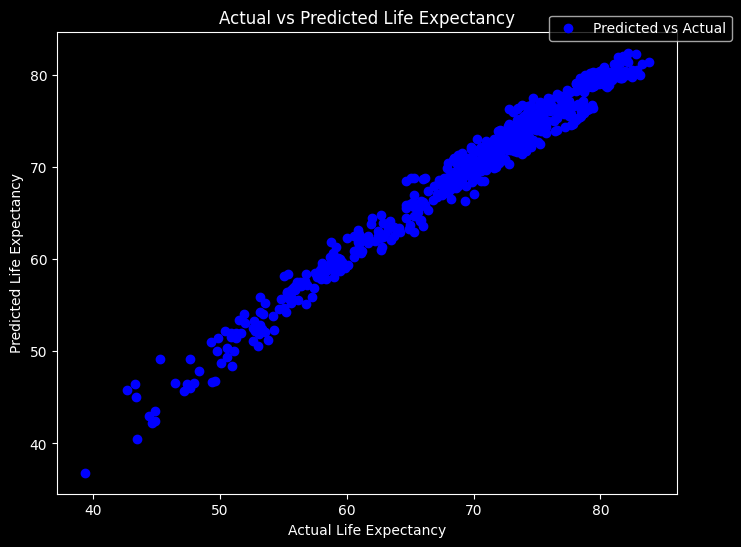

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, score_2, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

##### **3. Train a model to use for predictions below.**

In [ ]:
model_2.fit(X_train, y_train)

LinearRegression()

#### **Step #8: Use the model**

Specifically,

1. Predict the average life expectancy of two new countries.

2. *If you used linear regression*, look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the life expectancy of these new countries:**

**Country 1**

* `Region`: `Africa`
* `Year`: 2012
* `Infant_deaths`: 32
* `Under_five_deaths`: 41
* `Adult_mortality`: 417
* `Alcohol_consumption`: 1.2
* `Hepatitis_B`: 74
* `Measles`: 68
* `BMI`: 21
* `Polio`: 76
* `Diphtheria`: 71
* `Incidents_HIV`: 12.2
* `GDP_per_capita`: 56824
* `Population_mln`: 112
* `Thinness_ten_nineteen_years`: 7
* `Thinness_five_nine_years`: 11
* `Schooling`: 9
* `Economy_status_Developed`: 0
* `Economy_status_Developing`: 1

<br>

**Country 2**

* `Region`: `North America`
* `Year`: 2012
* `Infant_deaths`: 121
* `Under_five_deaths`: 63
* `Adult_mortality`: 269
* `Alcohol_consumption`: 2.7
* `Hepatitis_B`: 87
* `Measles`: 81
* `BMI`: 27
* `Polio`: 88
* `Diphtheria`: 88
* `Incidents_HIV`: 2.6
* `GDP_per_capita`: 73451
* `Population_mln`: 341
* `Thinness_ten_nineteen_years`: 4
* `Thinness_five_nine_years`: 7
* `Schooling`: 13
* `Economy_status_Developed`: 1
* `Economy_status_Developing`: 0

<br>

**NOTE**: You will need to use your `StandardScaler` to transform these new points *and* you will need to determine how these countries are represented in this given encoding.

In [ ]:
new_country_data = pd.DataFrame({
    'Infant_deaths': [32],
    'Under_five_deaths': [41],
    'Adult_mortality': [417],
    'Alcohol_consumption': [1.2],
    'Hepatitis_B': [74],
    'Measles': [68],
    'BMI': [21],
    'Polio': [76],
    'Diphtheria': [71],
    'Incidents_HIV': [12.2],
    'GDP_per_capita': [56824],
    'Population_mln': [112],
    'Thinness_ten_nineteen_years': [7],
    'Thinness_five_nine_years': [11],
    'Schooling': [9],
    'Economy_status_Developed': [0],
    'Economy_status_Developing': [1]
})
scaled_new_country_data = scaler.transform(new_country_data)
scaled_new_country_df = pd.DataFrame(scaled_new_country_data, columns=new_country_data.columns)
life_expectancy_prediction = model_1.predict(scaled_new_country_df)
print("Predicted Life Expectancy:", life_expectancy_prediction[0])

Predicted Life Expectancy: 84.61896074643897


In [ ]:
new_country_data = pd.DataFrame({
    'Infant_deaths': [121],
    'Under_five_deaths': [63],
    'Adult_mortality': [269],
    'Alcohol_consumption': [2.7],
    'Hepatitis_B': [87],
    'Measles': [81],
    'BMI': [27],
    'Polio': [88],
    'Diphtheria': [88],
    'Incidents_HIV': [2.6],
    'GDP_per_capita': [73451],
    'Population_mln': [341],
    'Thinness_ten_nineteen_years': [4],
    'Thinness_five_nine_years': [7],
    'Schooling': [13],
    'Economy_status_Developed': [1],
    'Economy_status_Developing': [0]
})
scaled_new_country_data = scaler.transform(new_country_data)
scaled_new_country_df = pd.DataFrame(scaled_new_country_data, columns=new_country_data.columns)
life_expectancy_prediction = model_1.predict(scaled_new_country_df)
print("Predicted Life Expectancy:", life_expectancy_prediction[0])

Predicted Life Expectancy: 85.63211803872139


##### **2. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_2.coef_
intercept = model_2.intercept_

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Life_expectancy"])

In [ ]:
print("Coefficients:")
coefficients.head()

Coefficients:


,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
0,-0.053996,-0.051421,-0.048288,0.063698,-0.008166,0.001894,-0.129465,0.002054,0.001845,0.095355,0.000024,-0.000122,-0.034316,0.001099,0.092956,0.349474,-0.349474


In [ ]:
print("\nIntercept:")
intercept.head()


Intercept:


,Life_expectancy
0,84.414976


<a name="p2w"></a>

---
### **Part 2: Wrap-up**
---

Now that you have trained several models to accomplish this task, answer the following questions:


1. Using only the best performing model according to the CV evaluation scores, what is its average performance according to K-Folds CV? What is its performance on the test set? **NOTE**: Round to the 3rd decimal place for simplicity.
2. Is Linear Regression or KNN better suited for this task? Why?
3. Are there any hyperparameters you need to tune and, if so, what are the best values you found?
4. What 3 variables seem to play the largest role in determining the `Life_expectancy`? **Hint**. Since the data is standardized, we can directly consider the relative size of the coefficients.
5. What does your model claim the average life expectancy to be, regardless of any features? **Hint**. This is the part of your model that is unrelated to any features.

<a name="p3"></a>

---
## **Part 3: Predicting Development Status**
---

Now you will create, evaluate, and train an ML model to predict `Economy_status_Developed` based on the provided numerical features. It is up to you to determine if you should be using Linear Regression or KNN here. If it is possible to use multiple models and/or multiple hyperparameter values, you should use and compare all possible options within reason (ex: don't try more than 4-5 models for a given part).

<br>

In this section, we will not break down the steps for you, but rather provide a few guiding questions throughout to help you find the best possible model.

### **Problem #3.1**

Using 10-Folds CV, evaluate the performance of any relevant models in predicting `Economy_status_Developed` using all numerical features (except `Country` and `Region` which you should still drop like above). Make sure you carry out proper standardization procedures and try to evaluate as wide a range of models as possible.

**NOTE**: Do not worry about making predictions (Step #8), rather just get the CV scores of any models you consider.

In [ ]:
from sklearn.linear_model import LogisticRegression
numerical_features = life_df.drop(['Country', 'Region', 'Economy_status_Developed'], axis=1)
X = numerical_features
y = life_df['Economy_status_Developed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logistic_regression = LogisticRegression()
knn_classifier = KNeighborsClassifier()
logistic_regression_scores = cross_val_score(logistic_regression, X_train_scaled, y_train, cv=10)
knn_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=10)
print("Logistic Regression CV Scores:", logistic_regression_scores)
print("KNN CV Scores:", knn_scores)

Logistic Regression CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
KNN CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### **Problem #3.2**

Did you happen to see any of your models perform perfectly (score of 1.0) during CV? If *any* model displays this (and definitely if *multiple* models do), you should be suspicious--it's almost always too good to be true!

<br>

This is usually a sign of data leakage or otherwise mishandled data. You should respond by:
1. Going line by line to ensure you have not accidentally caused any data leakage (ex: encoded, scaled, or otherwise done anything before splitting your data).
2. Exploring the data itself to see if there are any features that may be giving our models an unfair advantage.

<br>

Assuming you have coded things in the correct order, as we led you through in Part 2, we are most likely facing the second problem. We should:
1. See if there are any features that give away the answer or are otherwise unrealistic for us to have when using the model in the real world.

2. Drop all such features.

#### **1. See if there are any features that give away the answer or are otherwise unrealistic for us to have when using the model in the real world.**

In particular, run the two cells below to see the *correlations* between the features and the label. You do not need to worry about the mathematical details of this statistical measure here. Instead, just focus on the following information. If two variables have a correlation of:

* **-1 or 1, they are *perfectly correlated*.** This means if you know one of them, you can always figure out the other. We should *almost always* drop one of these variables if we want our model to be at all useful or realistic.
* **Close to -1 or 1, they are *highly correlated*.** Depending on how close to -1 or 1 it is, this can be suspicious or too good to be true. Or perhaps they're good variables to use.
* **0, they are *completely uncorrelated*.** This means they have absolutely no measurable relationship to each other. These variables are fine to include, but if one of them is a feature and the other a label then that feature is unlikely to help our model at all.

In [ ]:
life_df.corr()['Economy_status_Developed']

Year                          -5.026601e-15
Infant_deaths                 -4.758662e-01
Under_five_deaths             -4.271342e-01
Adult_mortality               -4.293748e-01
Alcohol_consumption            6.703661e-01
Hepatitis_B                    1.135340e-01
Measles                        2.986933e-01
BMI                            2.432870e-01
Polio                          2.832601e-01
Diphtheria                     2.894172e-01
Incidents_HIV                 -1.756352e-01
GDP_per_capita                 6.675469e-01
Population_mln                -3.530183e-02
Thinness_ten_nineteen_years   -4.160977e-01
Thinness_five_nine_years      -4.148673e-01
Schooling                      5.994394e-01
Economy_status_Developed       1.000000e+00
Economy_status_Developing     -1.000000e+00
Life_expectancy                5.237910e-01
Name: Economy_status_Developed, dtype: float64

<Axes: >

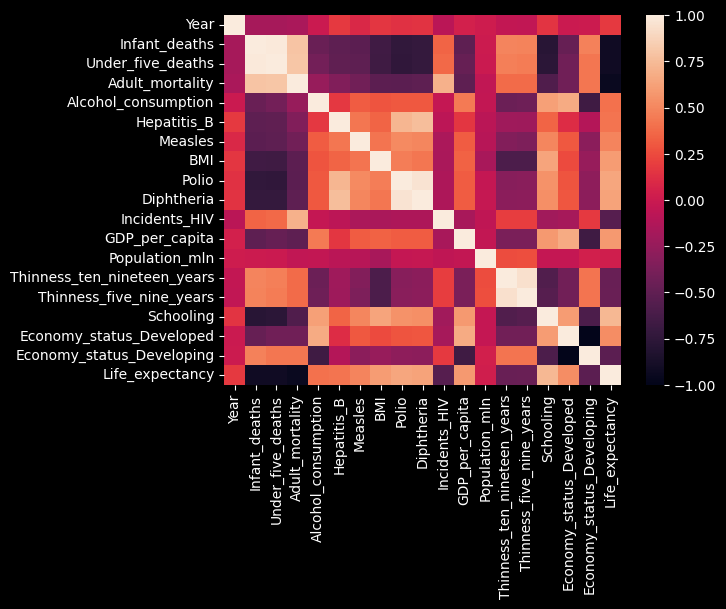

In [ ]:
# Just a fancy way to visualize the correlations.
import seaborn as sns
sns.heatmap(life_df.corr())

#### **2. Drop all such features.**

Drop all features with a correlation of 1 or -1 from the `features` data frame.

In [ ]:
correlation_matrix = features.corr()
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) == 1.0:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)
features = features.drop(highly_correlated_features, axis=1)

### **Reflection Question**

Before moving on, ensure you can answer the following question: beyond what the correlation says, *why* should this feature/these features be dropped? In other words, why is it unrealistic or not useful to include this feature when creating an ML model to predict `Economy_status_Developed` and why might these variables be too highly correlated?

### **Problem #3.3**

Now, redo your work from Problem #3.1 with this feature/these features dropped.

In [ ]:
from sklearn.linear_model import LogisticRegression
numerical_features = features.drop(['Economy_status_Developed'], axis=1)
X = numerical_features
y = features['Economy_status_Developed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logistic_regression = LogisticRegression()
knn_classifier = KNeighborsClassifier()
logistic_regression_scores = cross_val_score(logistic_regression, X_train_scaled, y_train, cv=10)
knn_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=10)
print("Logistic Regression CV Scores:", logistic_regression_scores)
print("KNN CV Scores:", knn_scores)

Logistic Regression CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
KNN CV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


<a name="p3w"></a>

---
### **Part 3: Wrapup**
---

Now that you have trained several models to accomplish this task, answer the following questions:


1. Is Linear Regression or KNN better suited for this task? Why?
2. Are there any hyperparameters you need to tune and, if so, what are the best values you found?
3. Are you confident in these results? Why or why not?

---
#End of Notebook

© 2023 The Coding School, All rights reserved